In [ ]:
!pip install pandas numpy scikit-learn joblib


In [ ]:
import pandas as pd

# Simulate CSV-like data inline
data = {
    "age": [45, 30, 52, 28, 38, 22],
    "sex": [1, 0, 1, 0, 1, 0],
    "blurred_vision": [1, 0, 1, 0, 0, 0],
    "floaters": [1, 0, 0, 0, 1, 0],
    "dryness": [0, 0, 1, 0, 1, 0],
    "diabetes": [1, 0, 1, 0, 1, 0],
    "screen_time_hours": [8, 3, 10, 4, 9, 2],
    "needs_doctor": [1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df.to_csv("data.csv", index=False)
# Save it as a CSV file
df.head()


,age,sex,blurred_vision,floaters,dryness,diabetes,screen_time_hours,needs_doctor
0,45,1,1,1,0,1,8,1
1,30,0,0,0,0,0,3,0
2,52,1,1,0,1,1,10,1
3,28,0,0,0,0,0,4,0
4,38,1,0,1,1,1,9,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load data
data = pd.read_csv("data.csv")

# Split inputs and outputs
X = data.drop(columns=["needs_doctor"])
y = data["needs_doctor"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# Save model
joblib.dump(model, "doctor_model.pkl")


✅ Model Accuracy: 1.00


['doctor_model.pkl']

In [ ]:
from google.colab import files
files.download("doctor_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load model
model = joblib.load("doctor_model.pkl")

# Sample input: [age, sex, blurred_vision, floaters, dryness, diabetes, screen_time]
sample = np.array([[48, 1, 1, 0, 1, 1, 7]])
result = model.predict(sample)

if result[0] == 1:
    print("🚨 Doctor appointment recommended.")
else:
    print("✅ No doctor visit needed.")




🚨 Doctor appointment recommended.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


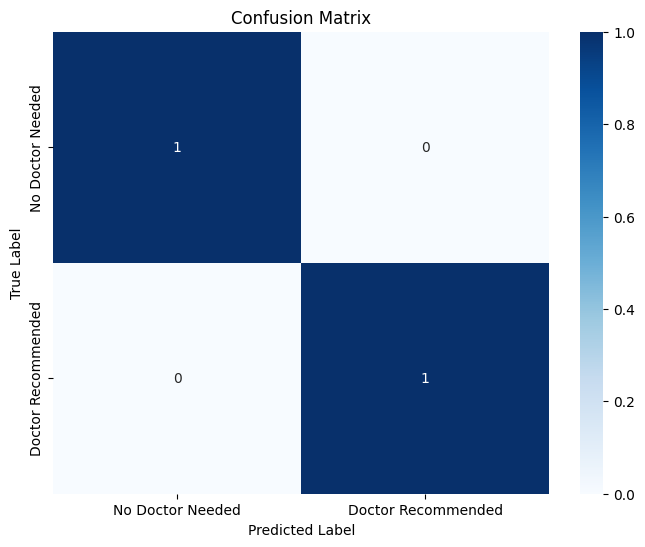

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Doctor Needed', 'Doctor Recommended'], yticklabels=['No Doctor Needed', 'Doctor Recommended'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()